In [2]:
import sys
sys.version

'3.6.6 |Anaconda, Inc.| (default, Jun 28 2018, 17:14:51) \n[GCC 7.2.0]'

In [2]:
'''
    Create 10/17/2018
    Author: Rui Meng
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
orig_data = pd.read_excel("stock.xls")
K = [5, 5, 5]

In [4]:
orig_data.columns

Index(['Code', 'S&PCOMP', 'JAPDOWA', 'DAXINDX', 'weekday', 'DAILY SELECT',
       'MONTH SELECT', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Name',
       'S&P 500 COMPOSITE - PRICE INDEX (~AL)',
       'NIKKEI 225 STOCK AVERAGE - PRICE INDEX',
       'DAX 30 PERFORMANCE - PRICE INDEX'],
      dtype='object')

In [5]:
def preprocess(dataset):
    SP = dataset["S&PCOMP"].values
    JA = dataset["JAPDOWA"].values
    DA = dataset["DAXINDX"].values

    SP_return = np.concatenate([(SP[1:] - SP[:-1])/SP[:-1], [np.nan]]) 
    JA_return = np.concatenate([(JA[1:] - JA[:-1])/JA[:-1], [np.nan]])
    DA_return = np.concatenate([(DA[1:] - DA[:-1])/DA[:-1], [np.nan]])

    fig = plt.figure()
    plt.plot(SP)
    plt.plot(JA)
    plt.plot(DA)
    plt.show()

    SP_quan = np.quantile(SP_return[:-1], q = np.linspace(0,1,K[0]+1))
    JA_quan = np.quantile(JA_return[:-1], q = np.linspace(0,1,K[1]+1))
    DA_quan = np.quantile(DA_return[:-1], q = np.linspace(0,1,K[2]+1))
    n = data.shape[0]

    SP_cat = pd.qcut(SP_return[:-1], K[0], labels=np.array(range(K[0]))).astype(np.int32)
    JA_cat = pd.qcut(JA_return[:-1], K[1], labels=np.array(range(K[1]))).astype(np.int32)
    DA_cat = pd.qcut(DA_return[:-1], K[2], labels=np.array(range(K[2]))).astype(np.int32)

    dataset["SP_cat"] = np.concatenate([SP_cat, [np.nan]])
    dataset["JA_cat"] = np.concatenate([JA_cat, [np.nan]])
    dataset["DA_cat"] = np.concatenate([DA_cat, [np.nan]])
    dataset.head()
    return dataset, SP_quan, JA_quan, DA_quan

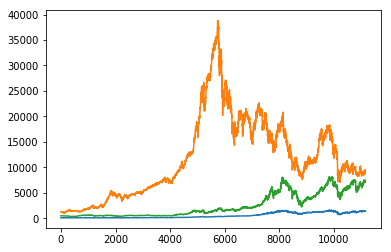

        Code  S&PCOMP  JAPDOWA  DAXINDX  weekday  DAILY SELECT  MONTH SELECT  \
0 1965-01-01    84.75  1216.55   482.95        6             0             1   
1 1965-01-05    84.63  1257.72   480.79        3             0             0   
2 1965-01-06    84.89  1263.99   483.39        4             1             0   
3 1965-01-07    85.26  1274.27   489.75        5             0             0   
4 1965-01-08    85.37  1286.43   491.61        6             0             0   

   SP_cat  JA_cat  DA_cat  
0     1.0     4.0     1.0  
1     3.0     3.0     3.0  
2     3.0     4.0     4.0  
3     2.0     4.0     3.0  
4     2.0     3.0     1.0  


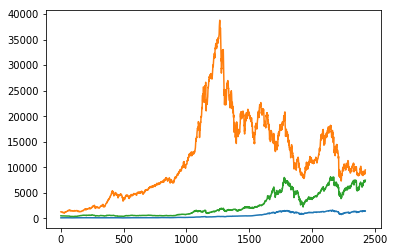

/home/rui/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rui/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/rui/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/in

        Code  S&PCOMP  JAPDOWA  DAXINDX  weekday  DAILY SELECT  MONTH SELECT  \
0 1965-01-06    84.89  1263.99   483.39        4             1             0   
1 1965-01-13    85.84  1281.67   479.08        4             1             0   
2 1965-01-20    86.60  1268.88   475.66        4             1             0   
3 1965-01-27    87.23  1258.21   482.31        4             1             0   
4 1965-02-03    87.63  1248.03   480.57        4             1             0   

   SP_cat  JA_cat  DA_cat  
0     3.0     3.0     1.0  
1     3.0     1.0     1.0  
2     3.0     1.0     3.0  
3     2.0     1.0     1.0  
4     1.0     2.0     2.0  


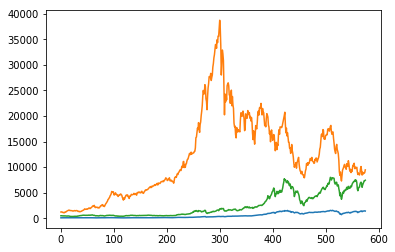

        Code  S&PCOMP  JAPDOWA  DAXINDX  weekday  DAILY SELECT  MONTH SELECT  \
0 1965-01-01    84.75  1216.55   482.95        6             0             1   
1 1965-02-01    87.58  1242.83   488.56        2             0             1   
2 1965-03-01    87.25  1206.48   471.42        2             0             1   
3 1965-04-01    86.32  1127.58   452.71        5             0             1   
4 1965-05-04    89.51  1173.48   454.31        3             1             1   

   SP_cat  JA_cat  DA_cat  
0     3.0     2.0     2.0  
1     1.0     1.0     1.0  
2     1.0     0.0     0.0  
3     3.0     3.0     2.0  
4     1.0     0.0     3.0  


In [49]:
data = orig_data.drop(['Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Name',
       'S&P 500 COMPOSITE - PRICE INDEX (~AL)',
       'NIKKEI 225 STOCK AVERAGE - PRICE INDEX',
       'DAX 30 PERFORMANCE - PRICE INDEX'], axis = 1)

import datetime
def CT(code):
    temp = np.datetime64(code).astype(datetime.datetime)
    ns = 1e-9
    time_DT = datetime.datetime.utcfromtimestamp(temp * ns)
    year = time_DT.year
    month = time_DT.month
    day = time_DT.day
    days = time_DT.date() - datetime.date(year, 1, 1)
    return days.days, year, month, day

updated_data, SP_quan, JA_quan, DA_quan = preprocess(data)
print(updated_data.head())

data_weekly = data.loc[data["DAILY SELECT"] == 1, :]
data_weekly.index = np.array(range(data_weekly.shape[0]))
# data_weekly.head()
updated_data_weekly, SP_quan_weekly, JA_quan_weekly, DA_quan_weekly = preprocess(data_weekly)
print(updated_data_weekly.head())

# Renew the monthly select
N = data.shape[0]
for indx in range(N):
    if CT(data["Code"].values[indx])[-2] != CT(data["Code"].values[indx-1])[-2]:
        data.loc[indx, "MONTH SELECT"] = 1
    else:
        data.loc[indx, "MONTH SELECT"] = 0


data_monthly = data.loc[data["MONTH SELECT"] == 1, :]
data_monthly.index = np.array(range(data_monthly.shape[0]))
# data_monthly.head()
updated_data_monthly, SP_quan_monthly, JA_quan_monthly, DA_quan_monthly = preprocess(data_monthly)
print(updated_data_monthly.head())

In [50]:
def preprocess_Y(dataset):
    # Remove the last row where there is no return rate.
    dataset = dataset.drop(dataset.index[len(dataset)-1])
    codes = dataset["Code"].values
    times = np.array([CT(code)[0] for code in codes])
    years = np.array([CT(code)[1] for code in codes])
    years_unique = np.unique(years)
    n = len(years_unique)
    T_num = np.zeros(n).astype(np.int32)
    year_s = years[0]
    for year in years:
        T_num[year-year_s] +=1
#     print(T_num)
    T_max = max(T_num)
    T = np.zeros([n, T_max])
    y = np.zeros([n, T_max, 3])
    s = 0
    for indx in range(n):
        T[indx, :T_num[indx]] = times[s:s+T_num[indx]]
#         print(s, indx, T_num[indx])
#         print(y[indx, :T_num[indx], :].shape)
#         print(dataset.loc[s:(s+T_num[indx]-1), ["SP_cat", "JA_cat", "DA_cat"]].shape)
#         print(dataset)
        y[indx, :T_num[indx], :] = dataset.loc[s:(s+T_num[indx]-1), ["SP_cat", "JA_cat", "DA_cat"]]
        s+=T_num[indx]
#     print(T)
#     print(y)
    print("y_shape={}, T_shape={}, T_num={}".format(y.shape, T.shape, T_num.shape))
    # divide dataset into training data and testing data
    T_num_train = T_num - 1
    y_test_indx = np.array([np.random.choice(t) for t in T_num])
    y_train_indx = np.array([np.delete(np.arange(T_max), y_test_indx[i]) for i in range(n)])
    y_train = np.array([y[i,y_train_indx[i,:], :] for i in range(n)])
    T_train = np.array([T[i, y_train_indx[i,:]] for i in range(n)])
    y_test = np.array([y[i, y_test_indx[i], :] for i in range(n)])
    T_test = np.array([T[i, y_test_indx[i]] for i in range(n)])
    print("y_train_shape={}, T_train_shape={}, T_num_train={}".format(y_train.shape, T_train.shape, T_num_train.shape))
    print("y_test_shape={}, T_test_shape={}".format(y_test.shape, T_test.shape))
    return y_train, T_train, T_num_train, y_test, T_test
    
# y, T, T_num = preprocess_Y(updated_data_monthly)    

In [51]:
y_train, T_train, T_num_train, y_test, T_test = preprocess_Y(updated_data_weekly)  
# Save data
import pickle
with open("stock_weekly.dat", "wb") as file:
    pickle.dump([y_train, T_train, T_num_train, y_test, T_test], file)

y_train, T_train, T_num_train, y_test, T_test = preprocess_Y(updated_data_monthly)
# Save data
import pickle
with open("stock_monthly.dat", "wb") as file:
    pickle.dump([y_train, T_train, T_num_train, y_test, T_test], file)

y_shape=(48, 52, 3), T_shape=(48, 52), T_num=(48,)
y_train_shape=(48, 51, 3), T_train_shape=(48, 51), T_num_train=(48,)
y_test_shape=(48, 3), T_test_shape=(48,)
y_shape=(48, 12, 3), T_shape=(48, 12), T_num=(48,)
y_train_shape=(48, 11, 3), T_train_shape=(48, 11), T_num_train=(48,)
y_test_shape=(48, 3), T_test_shape=(48,)


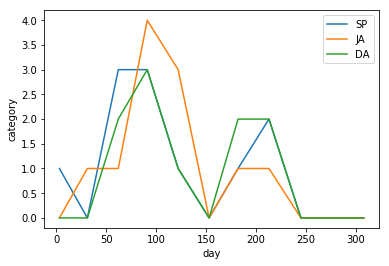

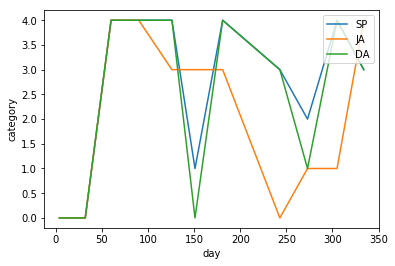

In [4]:
import pickle
with open("stock_monthly.dat", "rb") as f:
    y_train, T_train, T_num_train, y_test, T_test = pickle.load(f)
# EDA
N = y_train.shape[0]
labels = ["SP", "JA", "DA"]
year = 2008
n = year - 1965
fig = plt.figure()
for d in range(3):
    plt.plot(T_train[n, :T_num_train[n]], y_train[n, :T_num_train[n], d], label = labels[d])
    plt.legend(loc = 1)
plt.xlabel('day')
plt.ylabel('category')
plt.show()
fig.savefig('{}year_cat.png'.format(year))

year = 2009
n = year - 1965
fig = plt.figure()
for d in range(3):
    plt.plot(T_train[n, :T_num_train[n]], y_train[n, :T_num_train[n], d], label = labels[d])
    plt.legend(loc = 1)
plt.xlabel('day')
plt.ylabel('category')
plt.show()
fig.savefig('{}year_cat.png'.format(year))


In [54]:
np.round(SP_quan_monthly,3)

array([-0.219, -0.025, -0.001,  0.018,  0.037,  0.165])

In [55]:
np.round(JA_quan_monthly,3)

array([-0.198, -0.039, -0.005,  0.022,  0.048,  0.201])

In [56]:
np.round(DA_quan_monthly,3)

array([-0.234, -0.035, -0.004,  0.021,  0.05 ,  0.219])